# Online Data Science Courses
[data from Kaggle](https://www.kaggle.com/antonkozyriev/online-data-science-courses)
## Background
Nowadays, online education platforms offer a wide selection of online courses. For a beginner in self-study in Data Science, it is sometimes complicated to choose a course to start with. These data were collected to answer common questions when choosing a new subject.
## Inspiration
The first intention behind this data collection is to find out which online platform provides the highest quality of education. Also, further analysis can reveal the answers to questions like:
* Which platform has the highest GPA?
* Are the highest rated courses free or paid?
* Which platform has the most courses for beginners?
* For beginners, should you choose a free course or a paid course?
* Which platform is best for intermediate and advanced learners?
* Which courses have the highest ratings?

## Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,title,author,rating,votes_count,students_count,level,duration,platform,free
0,0,Машинное обучение и анализ данных,Moscow Institute of Physics and Technology,4.7,6382.0,100000.0,Intermediate,224.0,Coursera,False
1,1,Introducción a la Especialización en Ciencia d...,IBM,4.6,116.0,3400.0,Beginner,48.0,Coursera,False
2,2,Getting Started with SAS Programming,SAS,4.8,2083.0,67000.0,Beginner,22.0,Coursera,False
3,3,Introduction to Designing Data Lakes on AWS,Amazon Web Services,4.7,65.0,6100.0,Intermediate,14.0,Coursera,False
4,4,Estatística não-paramétrica para a tomada de d...,Universidade de São Paulo,4.4,109.0,9300.0,Intermediate,13.0,Coursera,False


We start by taking care of the types of each column in order to have the data in the right format for future operations.

In [3]:
# id
data = data.rename(columns={"Unnamed: 0":"id"})

data['title'] = data['title'].astype('str')
data['author'] = data['author'].astype('str')
data['level'] = data['level'].astype('str')
data['platform'] = data['platform'].astype('str')

In [4]:
data['free'] = data['free'].astype('category')

In [5]:
data.set_index('id', inplace=True)

Now we check if the dataset contains missing values.

Text(0.5, 1.0, 'Missing Values')

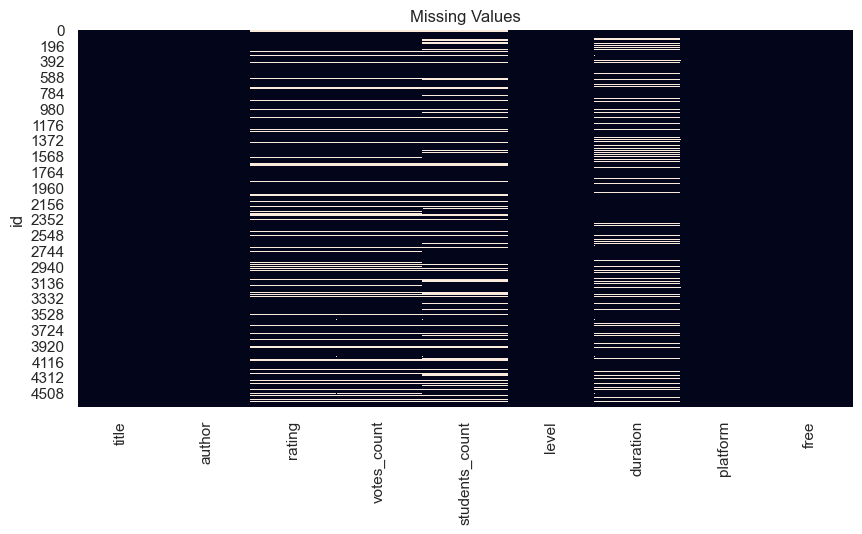

In [6]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing Values")

On this heatmap we can clearly see where the missing values are located. 

To deal with these missing values, the following steps will be performed:
1. We create a backup of our dataset before processing it;
2. We delete the missing values from `data` to obtain the new set `data_dna` ;
3. We compare the length of these two datasets and we notice a loss of about 1500 individuals (here courses). This represents a loss of 27.7% of the workforce.
4. In order to reduce the loss of data, we examine what these missing values are.

### Analysis of missing values
Looking at the missing numbers for each feature by platform, we can see that:
* Some platforms like *edX* have no `rating` and therefore no count of the number of votes `votes_count` ;
* Others like *PluralSight* do not seem to count the number of students `students_count` per course.

However, for the purpose of the analysis, this data is essential to evaluate the quality of the courses.

Finally, as for the duration of the courses `duration` which is missing in some places, we can discard this attribute.

In [7]:
backup_data = data

In [8]:
data_dna = data.dropna()
print("data : ", len(data))
print("data_dna : ", len(data_dna))

data :  4683
data_dna :  3389


In [9]:
for plat in data.platform.unique():
    print("valeurs manquantes de {} : ".format(plat), data[data.platform == plat].isnull().sum(), "total : {}".format(len(data[data.platform == plat])))

valeurs manquantes de Coursera :  title               0
author              0
rating            171
votes_count       171
students_count    315
level               0
duration          653
platform            0
free                0
dtype: int64 total : 996
valeurs manquantes de edX :  title               0
author              0
rating            326
votes_count       326
students_count    188
level               0
duration            0
platform            0
free                0
dtype: int64 total : 326
valeurs manquantes de Udemy :  title             0
author            0
rating            0
votes_count       0
students_count    0
level             0
duration          0
platform          0
free              0
dtype: int64 total : 2072
valeurs manquantes de Pluralsight :  title               0
author              0
rating             88
votes_count        88
students_count    174
level               0
duration            0
platform            0
free                0
dtype: int64 total 

In [10]:
data_no_duration = data
del data_no_duration['duration']
data_no_duration_dna = data_no_duration.dropna()

In [11]:
print("data : {}".format(len(data)))
print("data_dna : {}".format(len(data_dna)))
print("data_no_duration : {}".format(len(data_no_duration)))
print("data_no_duration_dna : {}".format(len(data_no_duration_dna)))

data : 4683
data_dna : 3389
data_no_duration : 4683
data_no_duration_dna : 3789


By cleaning the dataset in this way, only 19% of the population is lost as opposed to nearly 28%.
## Analysis

### Which platforms offer the most courses?

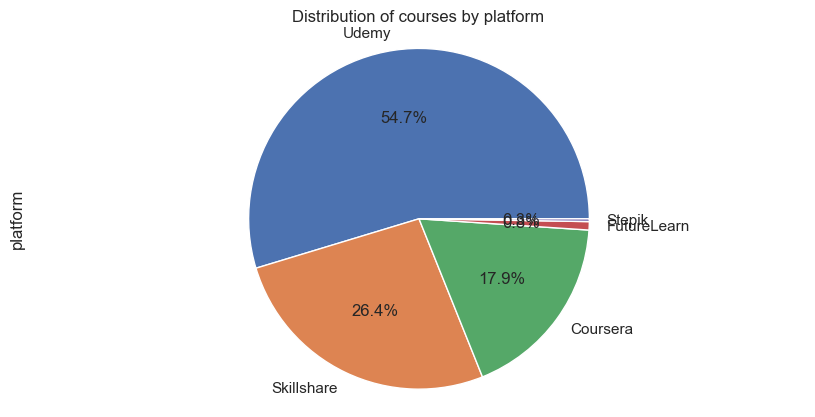

In [13]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
data_no_duration_dna.platform.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%') # Diagramme en secteurs
plt.axis('equal') # Celle ligne assure que le pie chart est un cercle plutôt qu'une ellipse
plt.title('Distribution of courses by platform')
plt.show()

We notice that Udemy offers more than half of the online courses. This result is not surprising when you consider that Udemy is the number one online course platform in the world for all sectors.

### Which platform offers the most free courses?

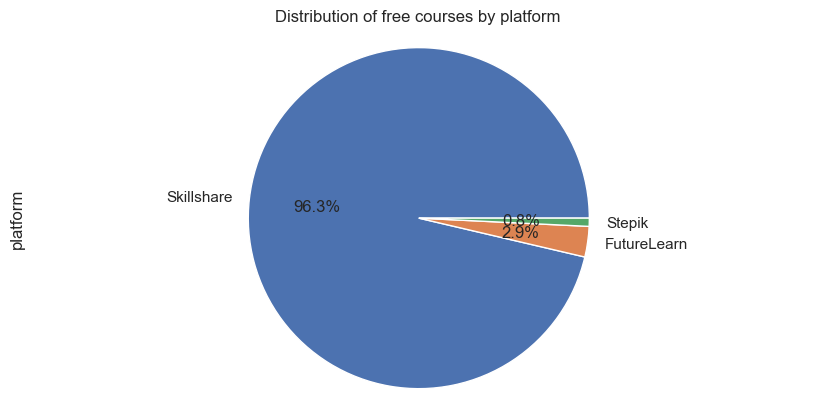

In [14]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
data_no_duration_dna[data_no_duration_dna['free'] == True].platform.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of free courses by platform')
plt.show()

This time we see that *Skillshare* has the most free courses.
### Which platform has the most students?

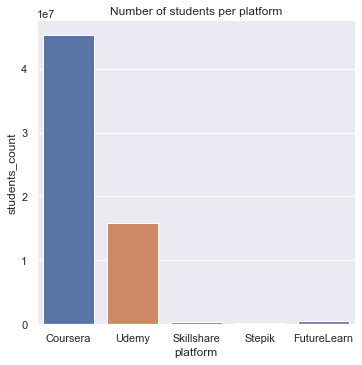

In [15]:
group = [] 
for plat in data_no_duration_dna.platform.unique():
    tmp = data_no_duration_dna.loc[data_no_duration['platform'] == plat]
    g = np.array([plat, tmp.students_count.sum()])
    group.append(g)

group_df = pd.DataFrame(group, columns=['platform', 'students_count'])
group_df['platform'] = group_df['platform'].astype('str')
group_df['students_count'] = group_df['students_count'].astype('float64')
sns.catplot(x='platform', y='students_count', kind="bar", data=group_df)
plt.title('Number of students per platform')
plt.show()

We can question the relevance of this graph. Indeed, we count the number of students per course and not per platform. As we do not have access to the students, we cannot distinguish if the same student has participated in 1, 2 or 3 courses (he is therefore counted between 1 and 3 times).

### Which platform has the best grade point average on its courses?

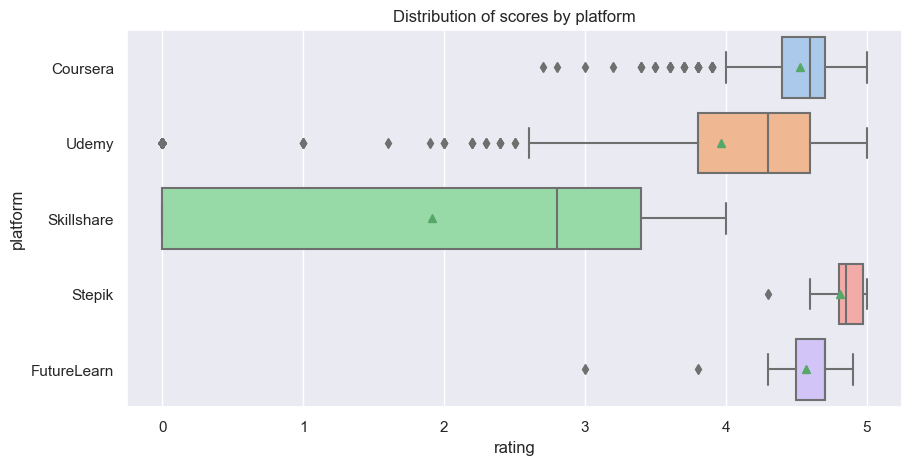

In [16]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.boxplot(x="rating", y="platform", data=data_no_duration_dna, orient="h", showmeans=True, palette="pastel")
plt.title('Distribution of scores by platform')
plt.show()

When we look at the 1st graph, we can see that the platforms *Futurelearn* and *Stepik* have the best ratings.

If we look at the platforms with more courses like *Udemy*, we can see that:
* more than half of the courses have a rating above the site average;
* 50% of courses are rated between 3.8 and 4.6 ;

If we look at the *Coursera* platform, with a few rare exceptions, all of its courses have at least a 4/5 rating.

In the case of *Skillshare*, the courses concerning data science are the worst of all the platforms. We can add that *Skillshare* is initially a platform for creative people and has a majority of its courses dedicated to more artistic disciplines than programming.

### Are the top rated courses paid or free?

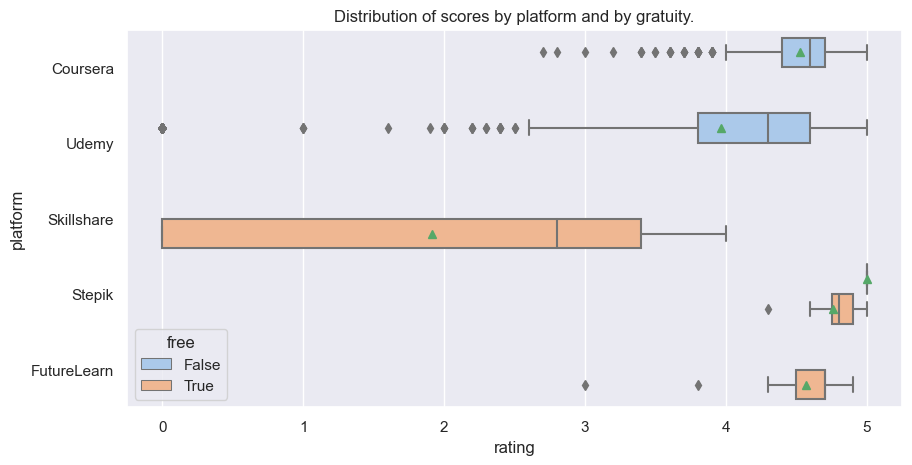

In [18]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.boxplot(x="rating", y="platform", hue="free", data=data_no_duration_dna, orient="h", 
                 showmeans=True, palette="pastel")
plt.title('Distribution of scores by platform and by gratuity.')
plt.show()

We can see that the courses mentioned above for the platforms *Udemy* and *Coursera* are paid.

For *FutureLearn*, the courses are indeed free but switching to a "prenium" plan allows to have more flexibility on the use of the courses, to see the same flexibility as for *Udemy* and *Coursera*, the courses can then be considered as paid.

*Stepik* has a completely free plan.

### Which platform has the most courses for beginners?

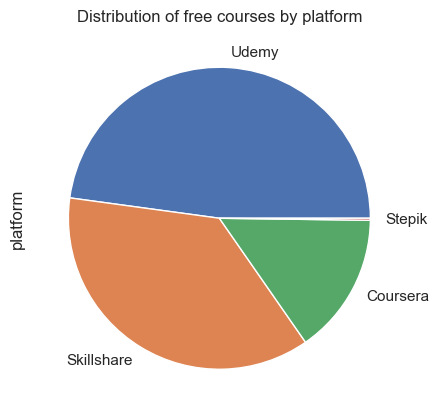

In [19]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
data_no_duration_dna[data_no_duration_dna['level'] == 'Beginner'].platform.value_counts(normalize=True).plot(kind='pie')
plt.title('Distribution of free courses by platform')
plt.show()

*Udemy* offers the most courses for beginners, which is not surprising since this platform has the most courses.
### Is it wise to take a paid course when you are a beginner?

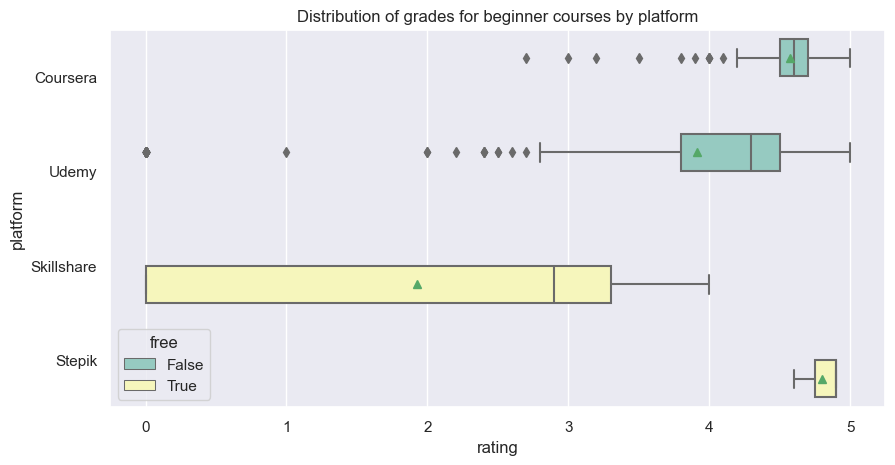

In [20]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
masque = (data_no_duration_dna["level"] == "Beginner")
ax = sns.boxplot(x="rating", y="platform", hue="free", data=data_no_duration_dna[masque], 
                 orient="h", showmeans=True, palette="Set3")
plt.title('Distribution of grades for beginner courses by platform')
plt.show()

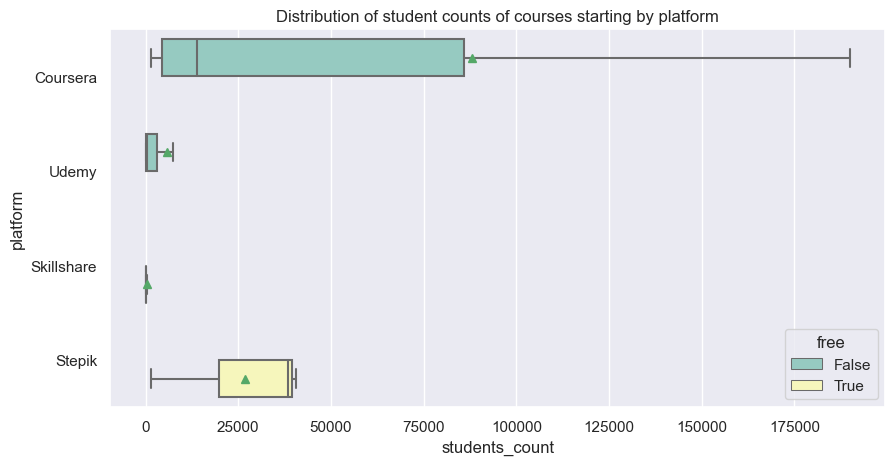

In [21]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
masque = (data_no_duration_dna["level"] == "Beginner")
ax = sns.boxplot(x="students_count", y="platform", hue="free", data=data_no_duration_dna[masque], 
                 orient="h", showmeans=True, showfliers=False, palette="Set3")
plt.title('Distribution of student counts of courses starting by platform')
plt.show()

With regard to the evaluation of the course, we cannot really say that it is better to take a free course than a paid course. However, we can see that two platforms stand out:
* for **paying** courses: Coursera ;
* for **free** courses: Stepik.

These results are supported by the number of students that these courses have. (cf. the 2nd graph)

### What about the choice of platforms for the *intermediate* and *advanced* levels?

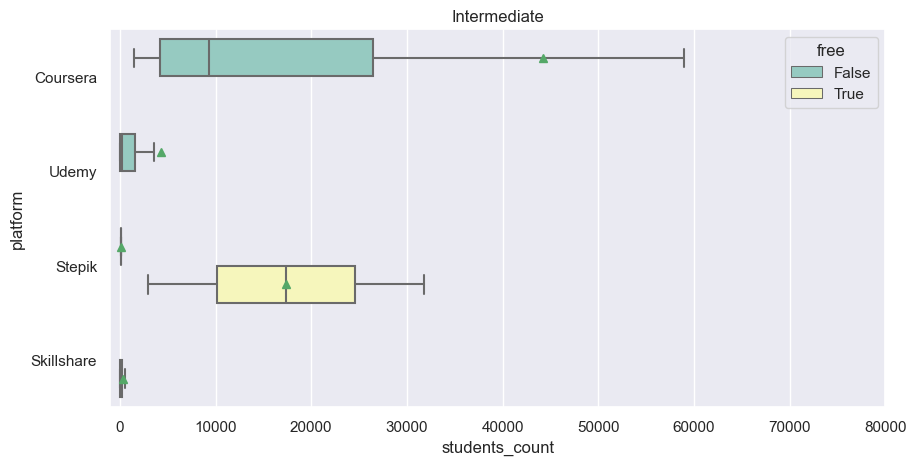

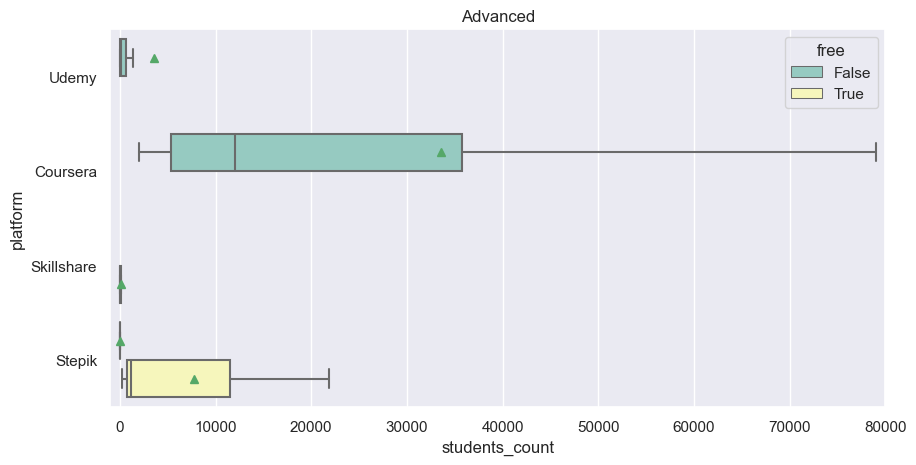

In [22]:
for lvl in data_no_duration_dna.level.unique():
    if((lvl != 'Beginner') & (lvl != 'Mixed')):
        fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
        masque = (data_no_duration_dna["level"] == lvl)
        ax = sns.boxplot(x="students_count", y="platform", hue="free", data=data_no_duration_dna[masque], orient="h", showmeans=True, showfliers=False, palette="Set3")
        ax.set_xlim(-1000, 80000)
        plt.title(lvl)
        plt.show()

As before, the platforms *Coursera* and *Stepik* stand out in the paid and free courses respectively.

### What are the top 10 rated courses?
#### All levels

In [23]:
data_no_duration_dna.sort_values(by=["rating", "votes_count"], ascending=False).head(10)

,title,author,rating,votes_count,students_count,level,platform,free
id,,,,,,,,
240,Want to be a Big Data Scientist?,"V2 Maestros, LLC",5.0,964.0,12523.0,Beginner,Udemy,False
345,Generate and visualize data in Python and MATLAB,Mike X Cohen,5.0,311.0,19595.0,Mixed,Udemy,False
2468,Machine Learning | Python ile Makine Öğrenmesi (),Devkod Akademi,5.0,94.0,374.0,Mixed,Udemy,False
1309,Matemática para Data Science - Pré-Cálculo,"Rafael F. V. C. Santos, Ph.D.",5.0,80.0,512.0,Mixed,Udemy,False
458,Python Temelleri ve Python ile Görüntü İşleme ...,Yılmaz Alaca,5.0,52.0,252.0,Mixed,Udemy,False
1731,Data Science with R and Python,Oak Academy,5.0,28.0,115.0,Mixed,Udemy,False
891,Python Data Analysis and Data Science Essentials.,Fanuel Mapuwei,5.0,26.0,893.0,Beginner,Udemy,False
2756,Introduction to Predictive Modeling,University of Minnesota,5.0,24.0,1700.0,Mixed,Coursera,False
4142,Build Real World Data Science & Machine Learni...,TheMachineLearning.Org .,5.0,22.0,420.0,Mixed,Udemy,False


#### Beginner level

In [24]:
data_no_duration_dna[data_no_duration_dna["level"] == "Beginner"].sort_values(by=["rating", "votes_count"], ascending=False).head(10)

,title,author,rating,votes_count,students_count,level,platform,free
id,,,,,,,,
240,Want to be a Big Data Scientist?,"V2 Maestros, LLC",5.0,964.0,12523.0,Beginner,Udemy,False
891,Python Data Analysis and Data Science Essentials.,Fanuel Mapuwei,5.0,26.0,893.0,Beginner,Udemy,False
4673,Learn To Build Powerful AI Chatbots From Scrat...,Sufa Digital Media,5.0,17.0,353.0,Beginner,Udemy,False
1491,Introduction to Machine Learning for Begineers...,Aakash Singh,5.0,10.0,12.0,Beginner,Udemy,False
3580,Network Analytics for Business,HSE University,5.0,7.0,1700.0,Beginner,Coursera,False
1638,AI Product Management,Duke University,5.0,6.0,1500.0,Beginner,Coursera,False
3563,Corso pratico di Pandas e Python con esempi pe...,Mirco Baragiani,5.0,5.0,5.0,Beginner,Udemy,False
2396,R-Analyst - Lerne die statistische Programmier...,Christian Müller-Kett,5.0,4.0,4.0,Beginner,Udemy,False
4212,Álgebra Linear com R para Machine Learning e M...,Luciano Galdino,5.0,4.0,33.0,Beginner,Udemy,False


#### Beginner level and free

In [25]:
data_no_duration_dna[(data_no_duration_dna["level"] == "Beginner") & (data_no_duration_dna["free"] == True)].sort_values(by=["rating", "votes_count"], ascending=False).head(10)

,title,author,rating,votes_count,students_count,level,platform,free
id,,,,,,,,
3679,Analyzing data in R,Bioinformatics Institute,4.9,397.0,40584.0,Beginner,Stepik,True
1853,Probability Theory,Alexey Karachev,4.9,14.0,1462.0,Beginner,Stepik,True
2330,Introduction to Statistics,Bioinformatics Institute,4.6,56.0,38386.0,Beginner,Stepik,True
4681,Python For Beginners,Sara Al-Arab,4.0,70.0,83.0,Beginner,Skillshare,True
1812,Python for Absolute Beginners - Learn Python i...,Andreas Exadaktylos,4.0,50.0,425.0,Beginner,Skillshare,True
1341,Python for Absolute Beginners,Ali Hamdan,4.0,17.0,69.0,Beginner,Skillshare,True
2304,Computer Science: DATA STRUCTURES (Java),Scott Reese,4.0,9.0,217.0,Beginner,Skillshare,True
1549,Machine Learning for beginners with project,Aakash Singh,4.0,8.0,20.0,Beginner,Skillshare,True
3943,T-SQL In Two Hours,Tim Smith,4.0,7.0,128.0,Beginner,Skillshare,True


### What are the most recurring words in the course titles? 

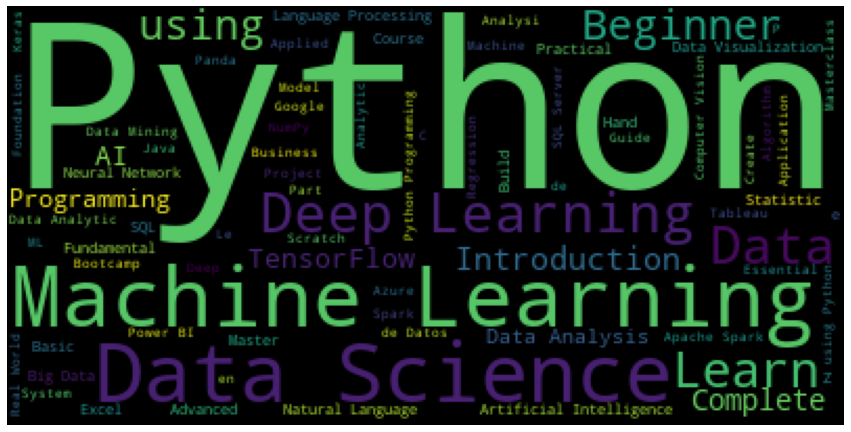

In [26]:
from wordcloud import WordCloud
plt.figure(figsize = (15, 15))
wordcloud = WordCloud(max_words = 1000, max_font_size = 120, random_state = 42).generate(str(data_no_duration_dna['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()